# Best Linear Model

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("community_health_MLR.csv")

In [7]:
df.head()

,age,gender,race/ethnicity,weight,height,visits
0,47,0,4,111.0,165.0,28
1,26,1,3,127.0,168.0,23
2,26,1,2,90.0,173.0,14
3,39,1,3,107.0,185.0,21
4,55,1,1,90.0,155.0,27


##### we will define a new column bmi

In [12]:
df["bmi"] = round(df["weight"] / (df["height"]/100)**2,2)

In [13]:
df.head()

,age,gender,race/ethnicity,weight,height,visits,bmi
0,47,0,4,111.0,165.0,28,40.77
1,26,1,3,127.0,168.0,23,45.00
2,26,1,2,90.0,173.0,14,30.07
3,39,1,3,107.0,185.0,21,31.26
4,55,1,1,90.0,155.0,27,37.46


In [14]:
df.to_csv("community_health_evolved.csv",index=False)

<Axes: xlabel='visits', ylabel='bmi'>

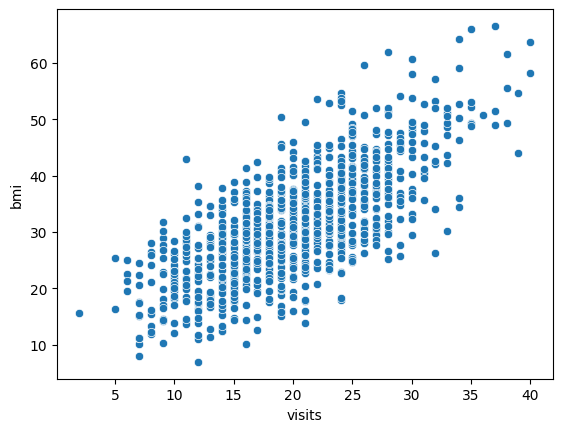

In [15]:
sns.scatterplot(data=df, x="visits",y="bmi")

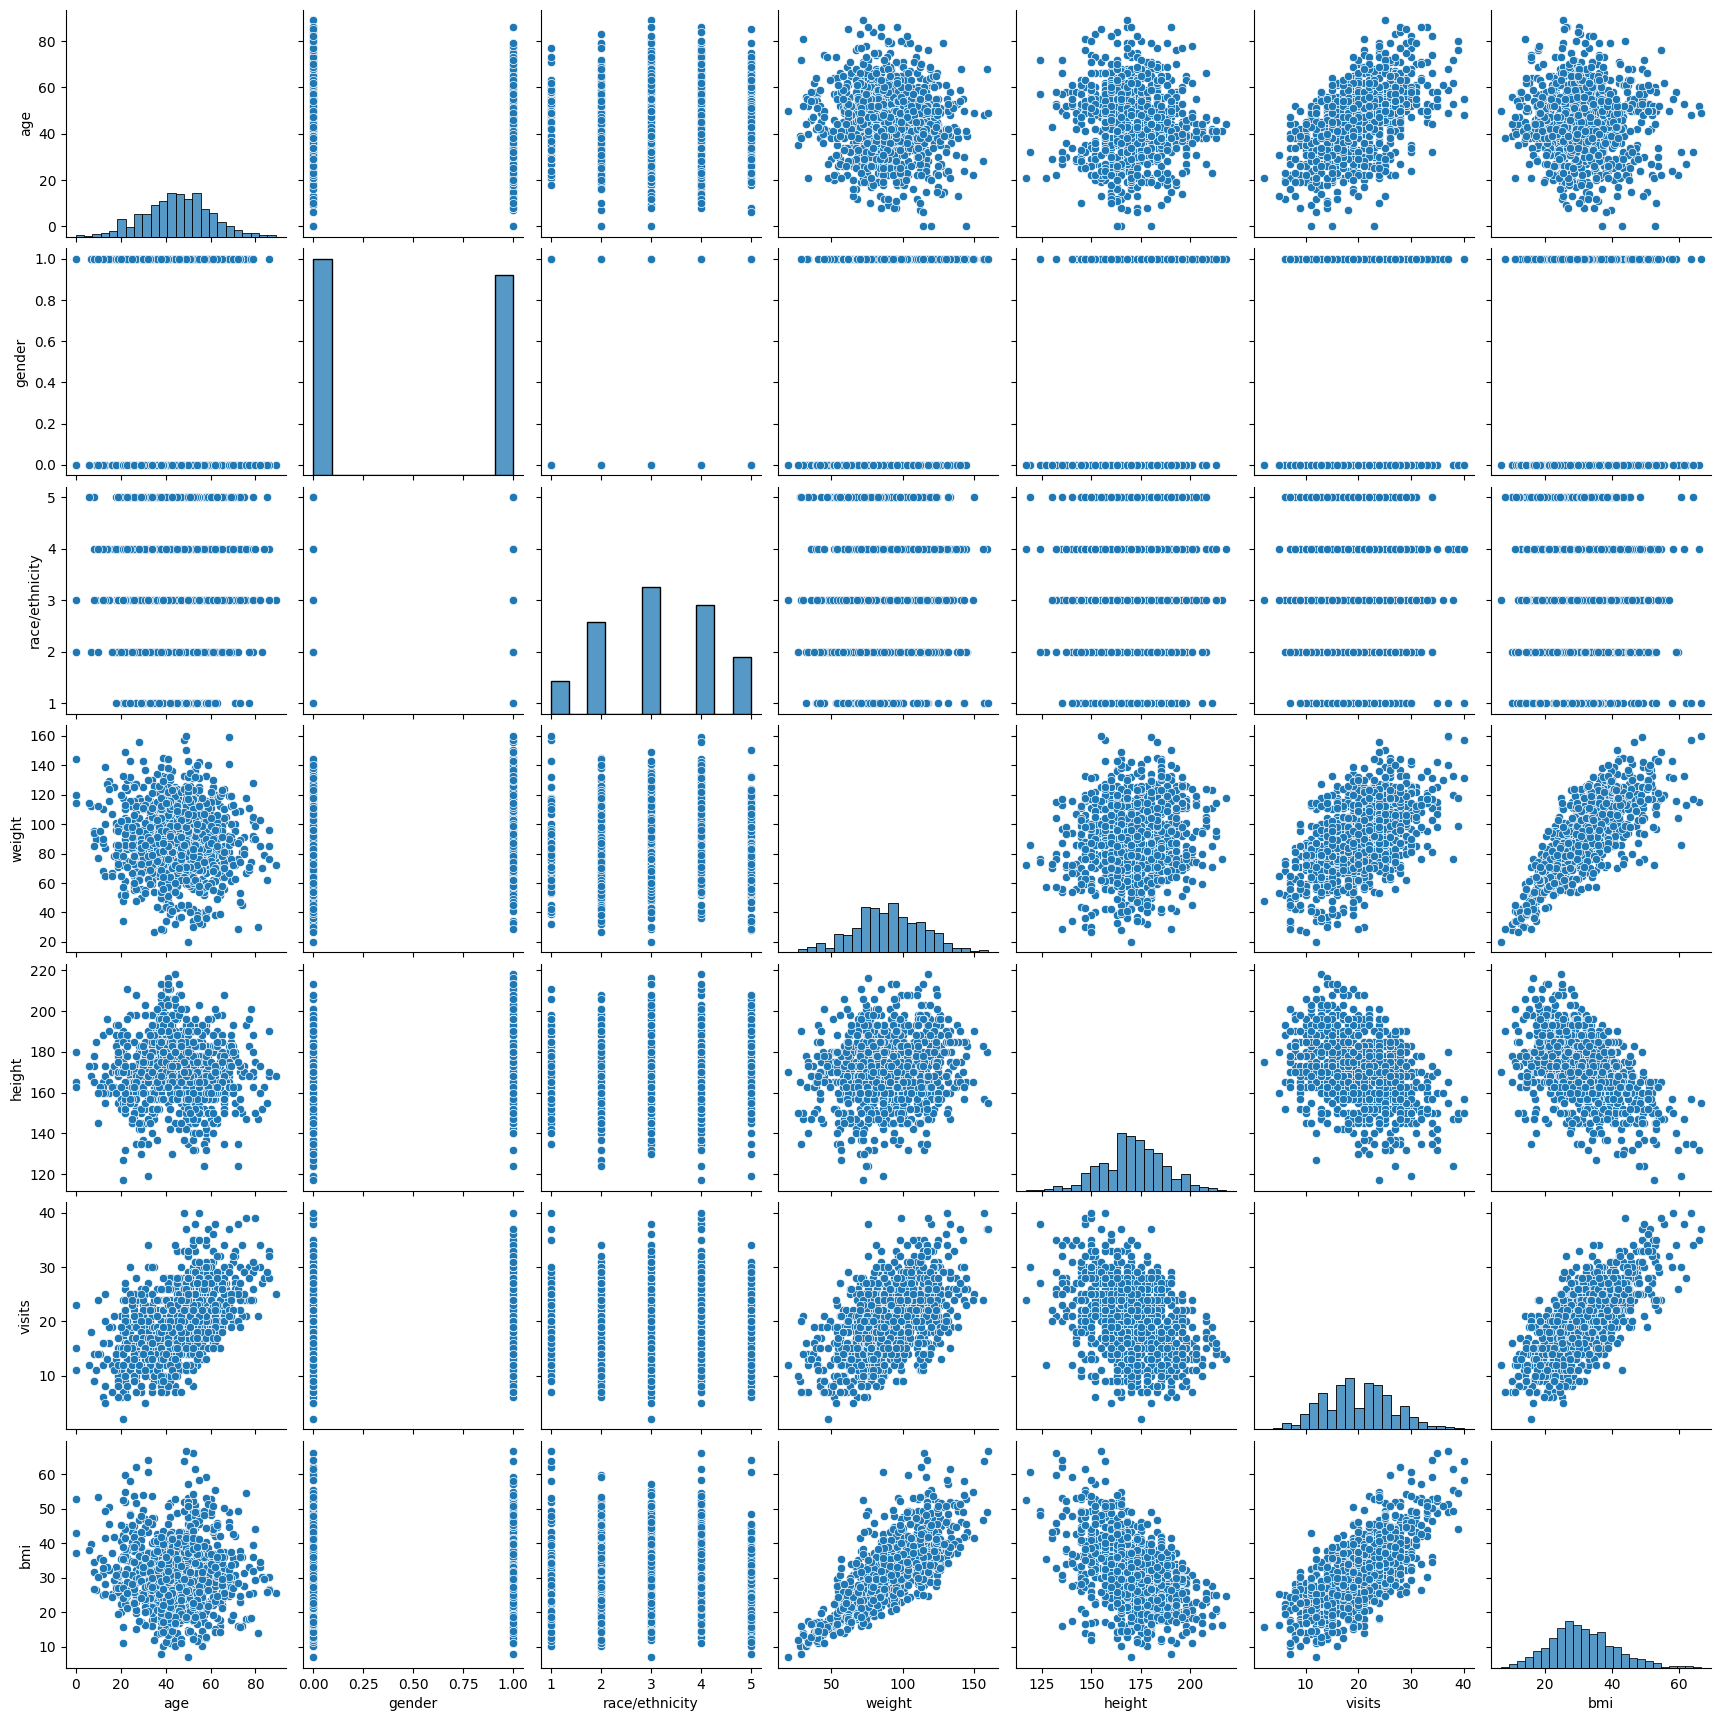

In [16]:
sns.pairplot(df)

In [17]:
df.corr()

,age,gender,race/ethnicity,weight,height,visits,bmi
age,1.000000,0.023866,0.009756,-0.084586,-0.063454,0.539543,-0.041481
gender,0.023866,1.000000,0.030425,0.272045,0.296501,0.066747,0.051005
race/ethnicity,0.009756,0.030425,1.000000,0.018091,0.031233,0.006324,-0.005990
weight,-0.084586,0.272045,0.018091,1.000000,0.141370,0.543433,0.772455
height,-0.063454,0.296501,0.031233,0.141370,1.000000,-0.386140,-0.493038
visits,0.539543,0.066747,0.006324,0.543433,-0.386140,1.000000,0.723839
bmi,-0.041481,0.051005,-0.005990,0.772455,-0.493038,0.723839,1.000000


## Train Test Split

In [19]:
X = df.drop("visits",axis=1)
y= df["visits"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X.head()

,age,gender,race/ethnicity,weight,height,bmi
0,47,0,4,111.0,165.0,40.77
1,26,1,3,127.0,168.0,45.00
2,26,1,2,90.0,173.0,30.07
3,39,1,3,107.0,185.0,31.26
4,55,1,1,90.0,155.0,37.46


In [22]:
y.head()

0    28
1    23
2    14
3    21
4    27
Name: visits, dtype: int64

In [24]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=99)

In [25]:
X_train.head()

,age,gender,race/ethnicity,weight,height,bmi
916,43,1,4,41.0,168.0,14.53
234,48,1,3,75.0,168.0,26.57
711,23,0,4,96.0,183.0,28.67
532,56,0,3,72.0,163.0,27.10
289,50,1,3,78.0,178.0,24.62


## Linear Regr

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
regr = LinearRegression()

In [28]:
regr.fit(X_train,y_train)

LinearRegression()

In [30]:
test_pred = regr.predict(X_test)

In [31]:
test_pred

array([25.23916354, 16.57651671, 15.58461484, 12.19852668, 28.4951401 ,
       12.26422789, 18.4299277 , 14.60361972, 26.05268875, 16.32655633,
       13.64762321, 17.15372525, 17.20686126, 14.44339639, 28.05682424,
       11.89391615, 17.58091501, 21.55707995, 24.42916087, 12.58798275,
       11.55173052, 31.21067344, 20.09222854, 16.85964674, 22.25020538,
       22.72268746, 21.95906609, 14.72706037, 32.77047188, 16.17908377,
       18.06680977, 28.00108529, 22.57066194, 30.41600464, 27.20368819,
       13.99910749, 18.24243361, 20.66992265, 10.87180702, 24.51039359,
       18.90815838, 18.46032454, 24.65314137, 20.72472141, 13.22410632,
       17.07071546, 24.57703239,  8.7292943 , 19.80957485, 30.10016728,
       20.47117229, 24.08203512, 23.19812357, 16.50277629,  8.64686536,
       17.73121237, 14.5710119 , 17.11439934, 30.58895194, 20.67187436,
       21.55996554, 18.69893487, 13.04667602, 24.48759419, 17.82970734,
       14.48983168, 19.22161736, 13.93648482, 15.86768444, 36.76

## Performance

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [33]:
print("Theta : ", round(regr.coef_[0],2))
print("intercept : ", round(regr.intercept_,2))
print("R^2 : ", round(r2_score(y_test,test_pred),2))
print("MAE : ",round(mean_absolute_error(y_test,test_pred),2))
print("RMSE : ",round(np.sqrt(mean_squared_error(y_test,test_pred))))

Theta :  0.25
intercept :  -7.09
R^2 :  0.86
MAE :  2.1
RMSE :  2


###### we can see r2 and mae are more efficient now

In [34]:
finalRegr = LinearRegression()

In [35]:
finalRegr.fit(X,y)

LinearRegression()

In [36]:
y_hat = finalRegr.predict(X)

In [37]:
finalRegr.coef_

array([ 2.48792764e-01,  9.89529724e-02,  2.40831964e-02,  8.43108472e-03,
       -3.40674583e-05,  4.81692716e-01])

In [38]:
coef_df = pd.DataFrame(finalRegr.coef_, X.columns, columns=["Coefficients"])

In [39]:
coef_df

,Coefficients
age,0.248793
gender,0.098953
race/ethnicity,0.024083
weight,0.008431
height,-0.000034
bmi,0.481693
